In [20]:
import pandas as pd
import plotly
import plotly.express as px



In [21]:
churn_data = pd.read_csv('DATA\churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


**Задание 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.**

In [23]:
# задание 9.1 
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: 'Ушедший' if x==1 else 'Лояльный')
counts =churn_data['Exited'].value_counts()

fig = px.bar(
    data_frame=counts,
    title='Соотношение ушедших и лояльных  клиентов'
)
fig.show()

Из графика видно что количество ушедших клиентов почти в 3.9 раза больше, чем лояльных.Необходимо более детальный анализ, чтобы понять в чем может быть причина ухода клиентов от банка 

**9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**


In [24]:
churn_data.Balance =churn_data.Balance.astype('int64')
churn_data.head()
churn_balance = churn_data[churn_data['Balance']>2500]

fig=px.histogram(
    data_frame= churn_balance,
    x='Balance',
    nbins=10
)
fig.show()


Из  графика видно,  что что основная часть клиентов держат на счету в среднем от 100 до 150т долларов. Также нет клиентов у которых  на счету более 250к долларов.
Исходя из  этого можно сделать вывод что клиентам не выгодно делать большие вклады в банке.

**9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**

In [25]:
#fig = plt.figure(figsize= (10,7))
#boxplot = sns.boxplot(
#    data=churn_data,
#    y='Exited',
#    x='Balance',
#    orient='h', 
#    color='red',
#    width=0.5
#)
#boxplot.set_title('Распределение баланса в разрезе оттока клиентов ')


In [26]:
fig = px.box(data_frame=churn_data,  x='Exited',
    y='Balance')
fig.show()

Из диаграммы видно,  что максимальное и медианное значение ушедших клиентов выше чем у лояльных,  что также говорит о том что клиенты скорее всего уходят из-за того что им не выгодно держать большие вклады в банке. 



**9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**


In [27]:
fig = px.box(data_frame=churn_data, y= 'Age', x='Exited')
fig.show()

Большой разброс идет в лояльных клиентов возрастом свыше 57 лет. Это может указывать на то, что в этой возрастной группе меньше лояльных клиентов, чем в других возрастных группах.
Так же банку стоит обратить внимание на клиентов возрастом от 40 до 50 лет , так какименно в этом возрсте самое большое кло-во ушедших клиентов 

**9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.**

для  этого графика используем метод joinplot(  диаграмма рассвеивания с настройкой по цветам)

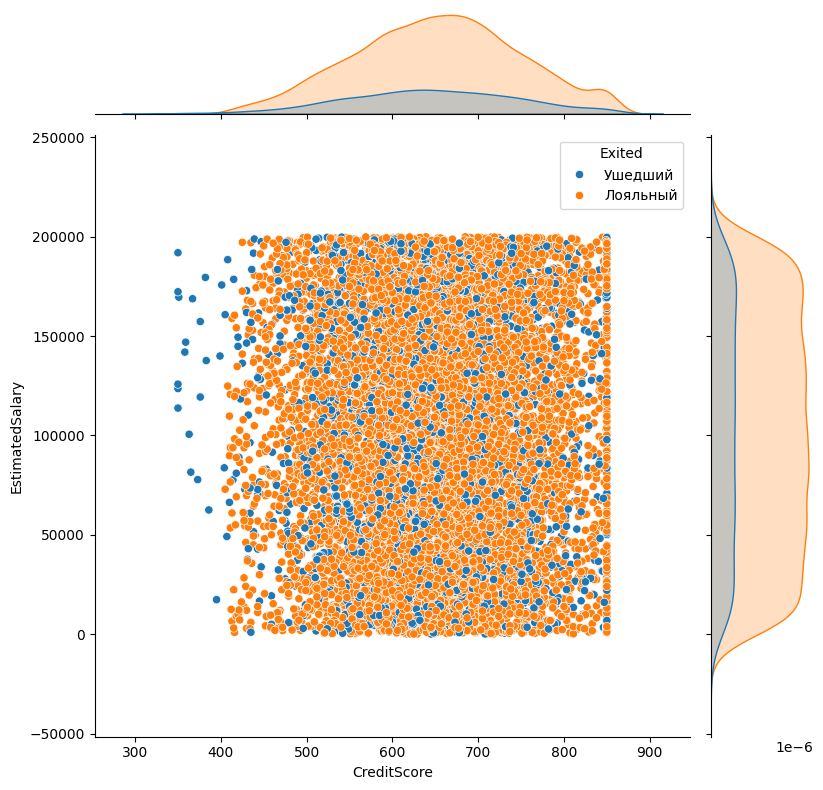

In [28]:
jointplot =  sns.jointplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    height= 8
)

Исходя из  графика видно,  что у лояльных клиетов кредитный рейтинг и предполагаемая заработная плата выше чем  у ушедших клиентов.

Так же стоит отметить что как таковой взаимосвязи между кредитным рейтингом и зп не наблюдается. так как график предполагаемой заработной планы увеличивается примерно с одинаковой скоростью, а кредитный рейтинг достигает пика примерно 650 и после чего начинает снижаться 
 так же стоит отметить что лояльных клиентов  с кредитным рейтингом меньше 400 не наблюдается. 

**9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.**

C:\Users\Admin\AppData\Local\Temp\ipykernel_7832\1613008508.py:10: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



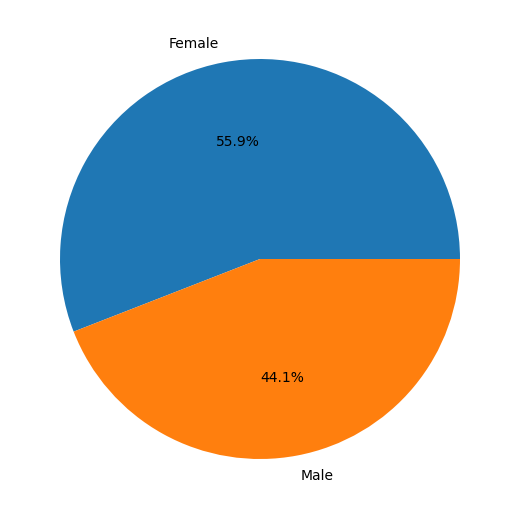

In [29]:
gone=  churn_data[churn_data['Exited']=='Ушедший']['Gender'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    gone,
    labels=gone.index,
    autopct='%.1f%%',
    
)
fig.show()

Из круговой диаграммы видно , что ушедших клиентов женщин примено на 11.8% выше чем мужчин

**9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.**

Text(0, 0.5, 'Кол-во клиентов')

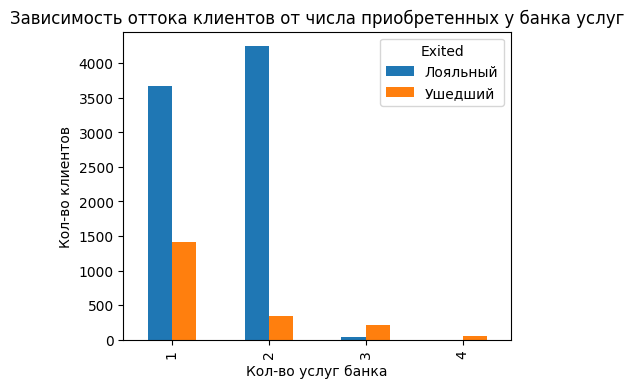

In [30]:
# делаем сводную таблицу


pivot_2 =  churn_data.pivot_table(
    'CustomerId',
    index='NumOfProducts', 
    columns='Exited', 
    aggfunc='count'
)

# строим график 

fig_7, axes_7 = plt.subplots(figsize=(5,4))
pivot_2.plot(
    kind='bar',
    ax=axes_7
);
axes_7.set_title('Зависимость оттока клиентов от числа приобретенных у банка услуг')
axes_7.set_xlabel('Кол-во услуг банка')
axes_7.set_ylabel('Кол-во клиентов')


Вывод: Из  диаграммы видно что отток клиентов значительно меньше если клиент использует до 2 услуг.
остальные услуги либо  не выгодны,  либо  имеют некие ограничения.

**9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?**


In [31]:
churn_data['IsActiveMember']=churn_data['IsActiveMember'].apply(lambda x:'Неактивный' if x == 0 else 'Активный')

# #делаем сводную таблицу по статусу клиента, где  сатус 1- активный, 0 неактивный
#Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

pivot_3 = churn_data.pivot_table(
    'CustomerId',
    index='IsActiveMember',
   columns='Exited',
   aggfunc='count'
)

fig =  px.bar(
    data_frame=pivot_3,
    width= 1000,
    height= 800,
    color='Exited',
    barmode='group',
    title='Влияние активного статуса на отток клиентов')
fig.update_layout(
    xaxis_title='Статус активного клиента банка',
    yaxis_title='Количество клиентов')
fig.show()

Отток клиентов уменьшается с получением активного статуса клиента 
Рекомендации банку:

1. Обновить услуги банка, выявив потребности клиентов 

2.  Повысить Процент по вкладу(для неактивных клиентов)

3. Предолжить возможность повышенного кешбека на первые 1-3 месяца

4. Повысить обслуживание клиентов 


**9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.**

In [32]:
churn_data['Exited']= churn_data['Exited'].apply(lambda x: 1 if x=='Ушедший' else 0)

pivot_4 = churn_data.pivot_table(
     values='Exited',
     index='Geography',
     aggfunc='mean'
)
pivot_4

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


In [33]:

fig = px.choropleth(
    data_frame=pivot_4,
    locations=pivot_4.index,
    locationmode="country names",
    color= 'Exited',
    range_color=[0,0.35],
    title='Соотношение ушедших клиентов по странам',
    width=800,
    height=600,
    color_continuous_scale='Reds'
)
fig.show()

Из  теппловой картограммы видно, что самый большой отток клиентов в Германии(32%) (примерно в 2 раза выше чем в испании(16%) и франции(16%)). Это может быть связано с падением процентной ставки либо появления конкурентного банка с более выгодными условиями.

**9.10Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.**

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [34]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
#создаем новый признак категории кредитного рейтинга
churn_data['CreditScoreCat']= churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,Активный,101348.88,1,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807,1,0,Активный,112542.58,0,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660,3,1,Неактивный,113931.57,1,Poor
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,Неактивный,93826.63,0,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510,1,1,Активный,79084.10,0,Excellent


In [40]:
churn_data ['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)


pivot_4 = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc= 'mean',
)


display(pivot_4)


fig = px.imshow(    
    pivot_4,
    labels={'x': 'Tenure', 'y': 'CreditScoreCat'},
    title='Heatmap'
)
fig.show()

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


На тепловой карте видно ,  что чаще всего из банка уходят клиенты категории 'Very_Poor', для этой категории наблюдаются самые низкие показатели 

***ОБЩИЙ ВЫВОД***

1. Для успешной работы, банку необходимо заверить клиентов в своей надежности, чтобы клиенты могли хранить большие суммы на счетах и уменьшить количество клиентов с нулевыми счетами.

2. Обновить условия по вкладам, возможно разработать программу по повышенной выплате процентов за вклад для старых клиентов, чтобы избежать их ухода.

3. Предложить высокий процент на остаток, чтобы клинты всегда хранили на своем счете какую-либо сумму.

4. Так же стоит обратить внимание на основную возрастную группу 31-39 лет. Сделать для них определенные условия, чтобы они остались в банке 

5. Обновить предоставляемые услуги для клиентов, сделать специальные предложения, увеличить кешбек для новых либо старых клиентов , для того чтобы заинтересовать/сохранить клиентов в банке